<h1>HW5</h1>

# Question 1
### (Beta Distribution) Complete the following exercises 

### 1.1 

Create a function to calculate the probability density function (PDF) of  beta distribution:

\begin{equation*}
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}
\end{equation*}


* Function name: pdf_beta

* Input: $\alpha$, $\beta$, x

* Output: f(x;$\alpha$,$\beta$)

* Use SpecialFunctions.gamma() for the gamma function


In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\choan\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
using SpecialFunctions
using Plots

In [4]:
function pdf_beta(α, β, x)
    return ((SpecialFunctions.gamma(α + β))/(SpecialFunctions.gamma(α)*SpecialFunctions.gamma(β))) * (x .^ (α - 1)) .* ((1 .- x) .^ (β - 1))
end

pdf_beta (generic function with 1 method)

### 1.2

1. Create a x from 0 to 1 with increment of 0.001 as the probability of event. 
2. Create $\alpha$ = 0.5 and $\beta$ = 0.5
3. Calculate the pdf of the beta distribution over x 
4. Plot pdf vs. x
5. What is the shape of the beta distribution

In [5]:
x1 = 0:0.001:1
α1 = 0.5
β1 = 0.5

0.5

In [6]:
pdf1 = pdf_beta(α1, β1, x1)

1001-element Vector{Float64}:
 Inf
 10.070879119947094
  7.124753753869352
  5.820253769605504
  5.0430173514088645
  4.512877913680636
  4.121746804537356
  3.8179170024651183
  3.5731339528842536
  3.370482257695184
  3.1991347258556537
  3.0517969800827247
  2.923351462876269
  ⋮
  3.051796980082725
  3.199134725855654
  3.3704822576951843
  3.5731339528842536
  3.8179170024651183
  4.121746804537357
  4.512877913680636
  5.0430173514088645
  5.820253769605503
  7.124753753869352
 10.070879119947092
 Inf

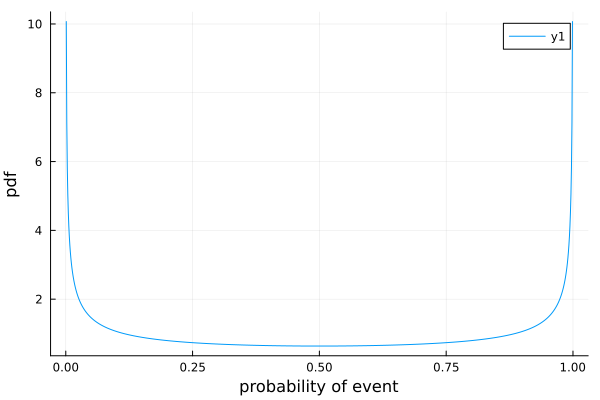

In [7]:
plot(x1, pdf1, xlabel = "probability of event", ylabel = "pdf")

The shape of this beta distribution looks like a wide U-shape where y reaches infinity when approaching 0 and 1. 

### 1.3

1. Change $\alpha$ = 1 and $\beta$ = 1
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

In [8]:
x2 = 0:0.001:1
α2 = 1
β2 = 1

1

In [9]:
pdf2 = pdf_beta(α2, β2, x2)

1001-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

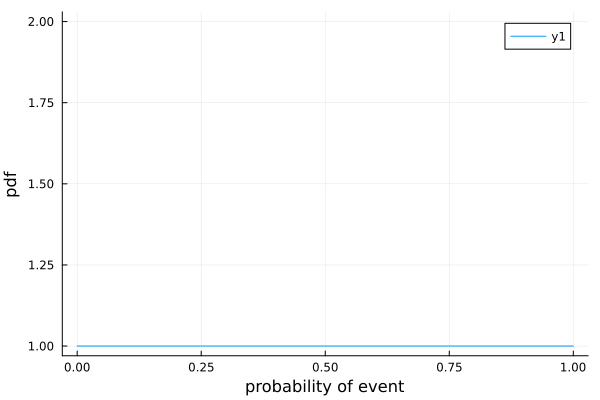

In [10]:
plot(x2, pdf2, xlabel = "probability of event", ylabel = "pdf")

The shape of this beta distribution is a horizontal line with no slope from 0 to 1.

### 1.4

1. Change $\alpha$ = 5 and $\beta$ = 5
2. Calculate the pdf of the beta distribution over x 
3. Plot pdf vs. x
4. What is the shape of the beta distribution

In [11]:
x3 = 0:0.001:1
α3 = 5
β3 = 5

5

In [12]:
pdf3 = pdf_beta(α3, β3, x3)

1001-element Vector{Float64}:
 0.0
 6.274837774806301e-10
 9.999601597601281e-9
 5.0420390112893434e-8
 1.5871496163360772e-7
 3.859338658710937e-7
 7.970601352994381e-7
 1.4707190015234648e-6
 2.4988902700666064e-6
 3.986623341017553e-6
 6.051754863e-6
 8.824629007955174e-6
 1.2447820354252309e-5
 ⋮
 8.824629007955174e-6
 6.051754863e-6
 3.986623341017553e-6
 2.4988902700666064e-6
 1.4707190015234648e-6
 7.970601352994381e-7
 3.859338658710937e-7
 1.5871496163360772e-7
 5.042039011289344e-8
 9.999601597601283e-9
 6.274837774806301e-10
 0.0

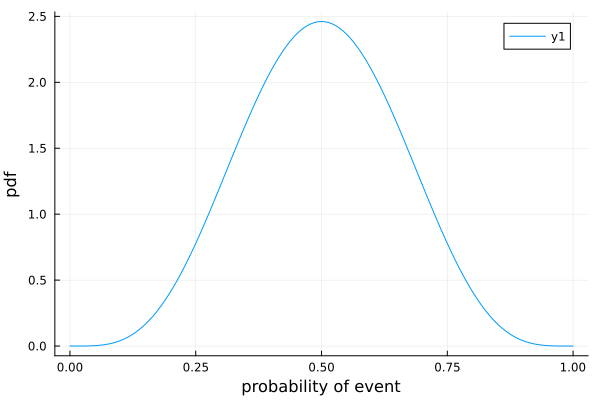

In [13]:
plot(x3, pdf3, xlabel = "probability of event", ylabel = "pdf")

The shape of this beta distribution is a bell curve where the peak is at 0.50.

#### In our class on Tuesday, we went through how a Beta distribution is used as the conjugate prior of a binomial distribution that can be used in bayesian inference. 

If you forgot the derivation, [here is an example](https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb). 

### 1.5

#### Assume we are using the beta distribution from 1.4 as our prior distribution for a coin flipping experiment to calculate the true distribution of flipping the coin (posterior distribution).

Given the experiment results in 35 heads and 65 tails. 

1. Calculate the pdf of the posterior distribution given the prior and the results.
2. Plot pdf of the prior distribution in the same plot
3. Describe how the distribution is changed after the data came in

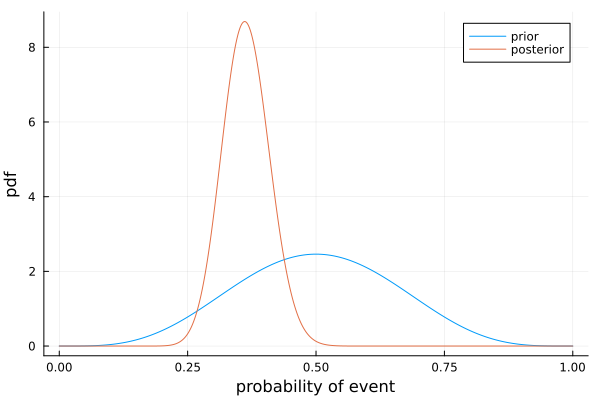

In [14]:
x3 = 0:0.001:1
α3 = 5
β3 = 5

heads = 35
tails = 65

α4 = α3 + heads
β4 = β3 + tails

prior = pdf_beta(α3, β3, x3)
posterior = pdf_beta(α4, β4, x3)

plot(x3, prior, xlabel = "probability of event", ylabel = "pdf", label = "prior")
plot!(x3, posterior, xlabel = "probability of event", ylabel = "pdf", label = "posterior")

Compared to the prior, the posterior has higher pdf values causing it to have a higher peak. The bell curve shape of the posterior is much more narrow than the prior. 

# Question 2
### (Conjugate Prior) Read the following example and complete the exercises 

#### In question 1, you see when a Beta distribution is used as the prior for a event that follows a binomial distribution (P(B|A)), the posterior distribution (P(A|B)) follows a Beta distribution. Using a conjugate prior simplify the posterior computation by keeping the posterior distribution identical to the prior distribution.


### 2.1 

Gaussian distribution is a conjugate prior of itself. Below is the probability density function of gaussian distribution. Given your likelihood P(Data|Hypothesis) follows N($\mu_1$, $\sigma_1$) and prior P(Hypothesis) follows N($\mu_2$, $\sigma_2$), derive the probability density function of the posterior distribution P(Hypothesis|Data) with updated $\mu$ and $\sigma$. Please show the `whole derivation process` to earn full credit.

\begin{equation*}
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}
\end{equation*}

*You can ignore the marginal probability during the derivation.

\begin{equation*}
P(A|B) \propto P(B|A)P(A) 
\end{equation*}

### Hint 1
See [this page](https://jupyterbook.org/en/stable/content/math.html) for how to write equations in jupyter notebook

### Hint 2
The posterior probability is gaussian 

### Hint 3
$x^a*x^b = x^{(a+b)}$

\begin{equation*}
P(Hypothesis|Data) \propto N(\mu_1, \sigma_1) * N(\mu_2, \sigma_2)
\end{equation*}

\begin{equation*}
P(Hypothesis|Data) \propto \frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2} * \frac{1}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{1}{2}(\frac{x-\mu_2}{\sigma_2})^2}
\end{equation*}

\begin{equation*}
P(Hypothesis|Data) \propto \frac{1}{\sqrt{2\pi\sigma_1^2}}*\frac{1}{\sqrt{2\pi\sigma_2^2}}*e^{-\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2}*e^{-\frac{1}{2}(\frac{x-\mu_2}{\sigma_2})^2}
\end{equation*}

\begin{equation*}
P(Hypothesis|Data) \propto \frac{1}{\sqrt{2\pi\sigma_1^2}}*\frac{1}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2-\frac{1}{2}(\frac{x-\mu_2}{\sigma_2})^2}
\end{equation*}

# Simplification of e

\begin{equation*}
e^{-\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2-\frac{1}{2}(\frac{x-\mu_2}{\sigma_2})^2} = e^{-(\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2+\frac{1}{2}(\frac{x-\mu_2}{\sigma_2})^2)}
\end{equation*}

\begin{equation*}
= e^{-(\frac{1}{2}(\frac{x-\mu_1}{\sigma_1})^2+\frac{1}{2}(\frac{x-\mu_2}{\sigma_2})^2)}
\end{equation*}

\begin{equation*}
= e^{-(\frac{2\sigma_2^2 (x-\mu_1)^2}{4\sigma_1^2\sigma_2^2}+\frac{2\sigma_1^2 (x-\mu_2)^2}{4\sigma_1^2\sigma_2^2})}
\end{equation*}

\begin{equation*}
= e^{-\frac{1}{4\sigma_1^2\sigma_2^2}({2\sigma_2^2}({x-\mu_1})^2+{2\sigma_1^2}({x-\mu_2})^2)}
\end{equation*}

\begin{equation*}
= e^{-\frac{1}{2\sigma_1^2\sigma_2^2}({\sigma_2^2}({x-\mu_1})^2+{\sigma_1^2}({x-\mu_2})^2)}
\end{equation*}

\begin{equation*}
= e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_1^2\sigma_2^2}(({x-\mu_1})^2+({x-\mu_2})^2)}
\end{equation*}

\begin{equation*}
= e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_1^2\sigma_2^2}(x^2 - 2\mu_1x + \mu_1^2 + x^2 - 2\mu_2x + \mu_2^2)}
\end{equation*}

\begin{equation*}
\mu_1^2 + \mu_2^2 = \mu_3^2
\end{equation*}

\begin{equation*}
\mu_1 + \mu_2 = \mu_3
\end{equation*}

\begin{equation*}
= e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_1^2\sigma_2^2}(x^2 - 2\mu_3x + \mu_3^2)}
\end{equation*}

\begin{equation*}
= e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_1^2\sigma_2^2}({x-\mu_3})^2}
\end{equation*}

\begin{equation*}
P(Hypothesis|Data) \propto \frac{1}{\sqrt{2\pi\sigma_1^2}}*\frac{1}{\sqrt{2\pi\sigma_2^2}}e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_1^2\sigma_2^2}({x-\mu_3})^2}
\end{equation*}

\begin{equation*}
\sigma_1^2\sigma_2^2 = \sigma_3^2
\end{equation*}

\begin{equation*}
P(Hypothesis|Data) \propto \frac{1}{\sqrt{2\pi\sigma_3^2}}e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_3^2}({x-\mu_3})^2}
\end{equation*}

### 2.2 

Based on the results you got in 2.1, what normalization factor is needed for the posterior to satisfy $$\int_{-\infty}^{\infty}P(A|B) = 1$$

\begin{equation*}
N(\mu_3, \sigma_3) = \frac{1}{\sqrt{2\pi\sigma_3^2}}e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_3^2}({x-\mu_3})^2}
\end{equation*}

\begin{equation*}
\int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi\sigma_3^2}}e^{-\frac{(\sigma_1^2+\sigma_2^2)}{2\sigma_3^2}({x-\mu_3})^2}= 1
\end{equation*}

\begin{equation*}
Normalization factor = \frac{1}{\sqrt{2\pi\sigma_3^2}}
\end{equation*}